# Test the `pyMGCS_tools` module - Membership probability

In [2]:
import os
import pandas as pd
import numpy as np

import sys

sys.path.append(os.path.abspath("/home/linux-machine/work/NGC6749/pyMGCS_tools"))

import statistical_membership.membership as stat_mem

from importlib import reload

import utils.plotting as utplot

reload(utplot)

<module 'utils.plotting' from '/home/linux-machine/work/NGC6749/pyMGCS_tools/utils/plotting.py'>

In [2]:
CATALOG_PATH = os.path.abspath("/home/linux-machine/work/NGC6749/catalogs")
OUTPUT_PATH = os.path.abspath("/home/linux-machine/work/NGC6749/pyMGCS_tools/output")

In [3]:
# v1cat = "/home/linux-machine/NGC6749/NGC6749.CAT.v1"

df_cat_v1 = pd.read_csv(os.path.join(CATALOG_PATH, "NGC6749.CAT.v1"), sep="\s+")
df_cat_v1 = df_cat_v1[df_cat_v1["oktot(54)"] == 1]
df_cat_v1["membership"] = 0.0

cluster_mag = ["m6061c(6)", "m8141c(7)"]
cluster_mag_corr = [col + "_drcorr" for col in cluster_mag]
field_mag = ["m6062c(8)", "m8142c(9)"]

df_field = df_cat_v1[df_cat_v1[field_mag[0]] != 0.0]
df_cluster = df_cat_v1[df_cat_v1[cluster_mag[0]] != 0.0]

fov_wfc3 = 163.0**2  # arcsec squared
fov_acs = 202.0**2  # arcsec squared

Star density: 0.14 stars / arcsec^2 Min area for at least 1000 stars: 7092.94 arcsec^2
ITERATION 1
compute differential reddening..
count    50097.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: membership, dtype: float64
First iteration, correction threshold skipped


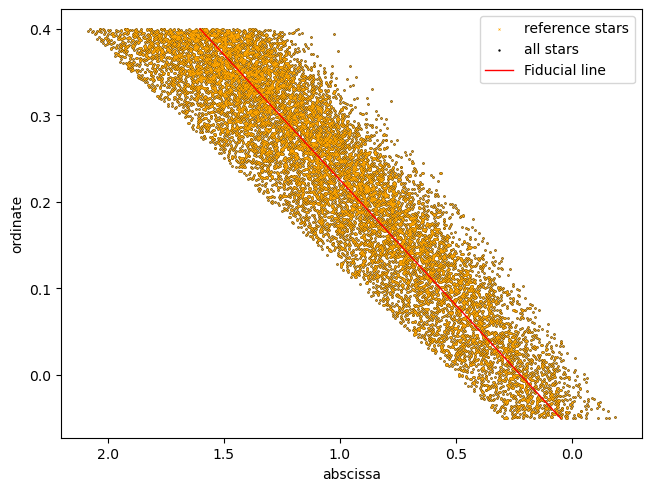

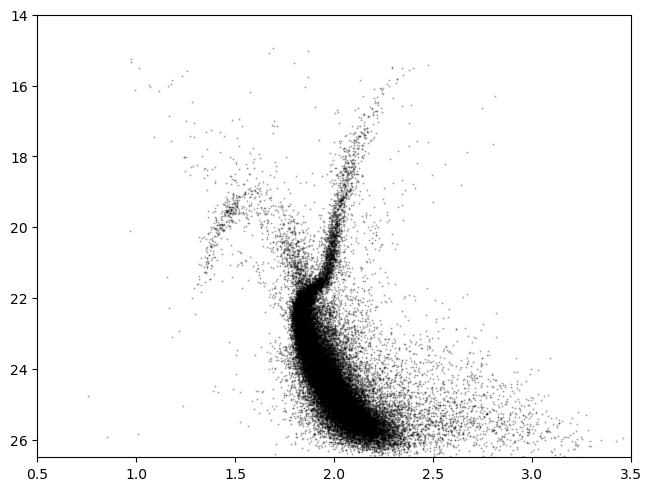

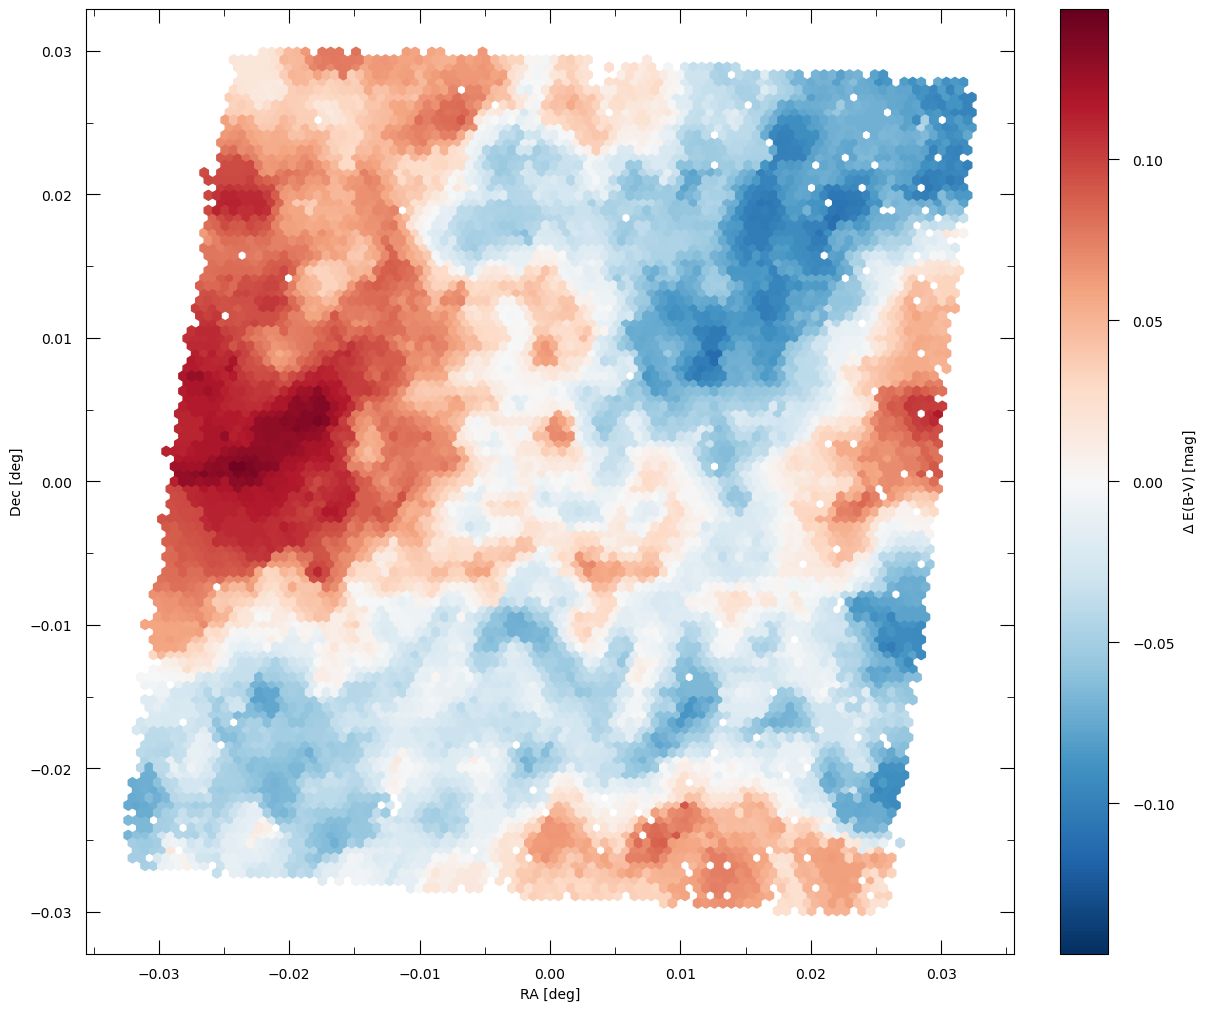

...differential reddening completed
EBV stat: 0.0068, -0.1171, 0.1466
Start decontamionation process..
	#### GROUP N.1 ####


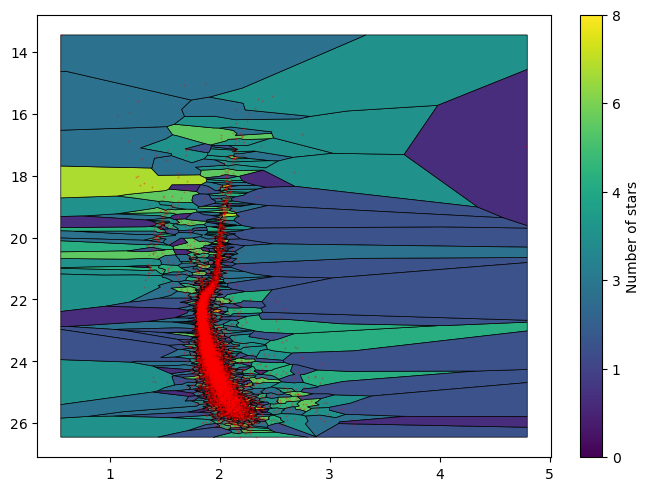

	Membership (mean, min, max): (0.8277, 0.0000, 0.9900)


	#### GROUP N.2 ####


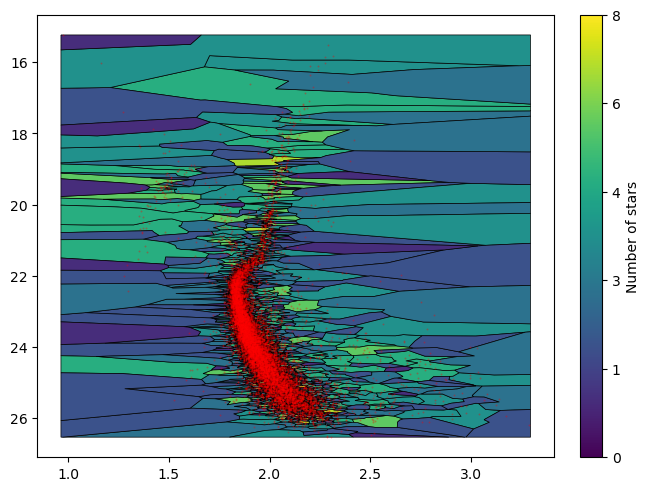

	Membership (mean, min, max): (0.8065, 0.0000, 0.9900)


	#### GROUP N.3 ####


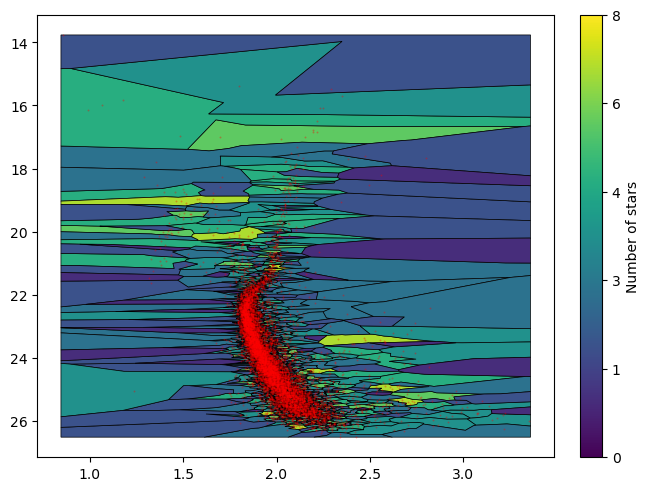

	Membership (mean, min, max): (0.7946, 0.0000, 0.9900)


	#### GROUP N.4 ####


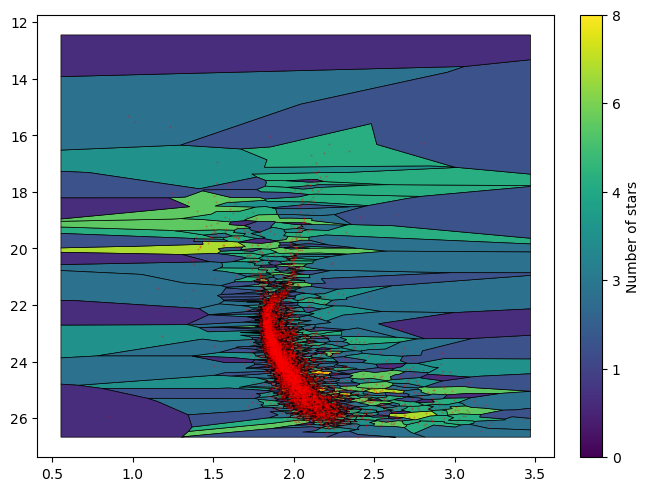

	Membership (mean, min, max): (0.7788, 0.0000, 0.9900)


	#### GROUP N.5 ####


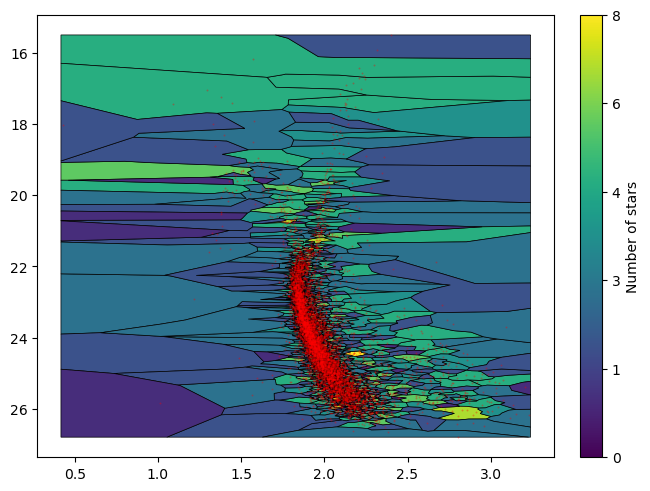

	Membership (mean, min, max): (0.7546, 0.0000, 0.9900)


	#### GROUP N.6 ####


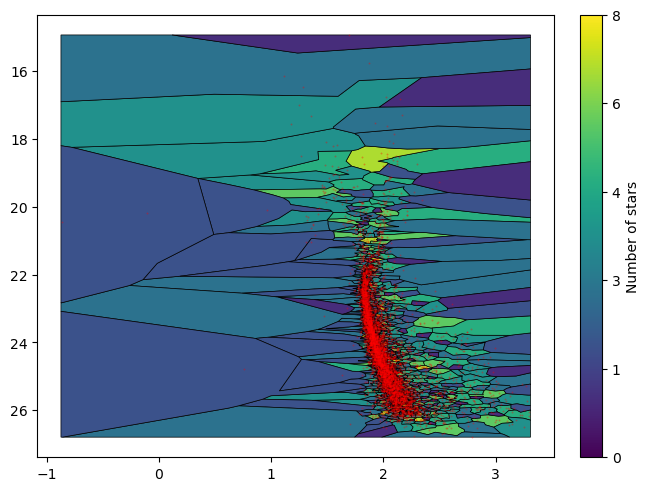

	Membership (mean, min, max): (0.7333, 0.0000, 0.9900)


ITERATION 2
compute differential reddening..
count    50097.000000
mean         0.888586
std          0.221660
min          0.000000
25%          0.910000
50%          0.990000
75%          1.000000
max          1.000000
Name: membership, dtype: float64
do calcuation of the Correction threshold


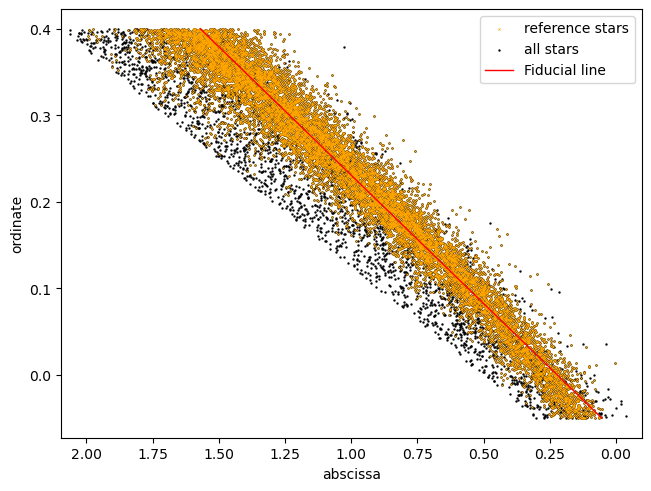

correction threshold at: 0.025


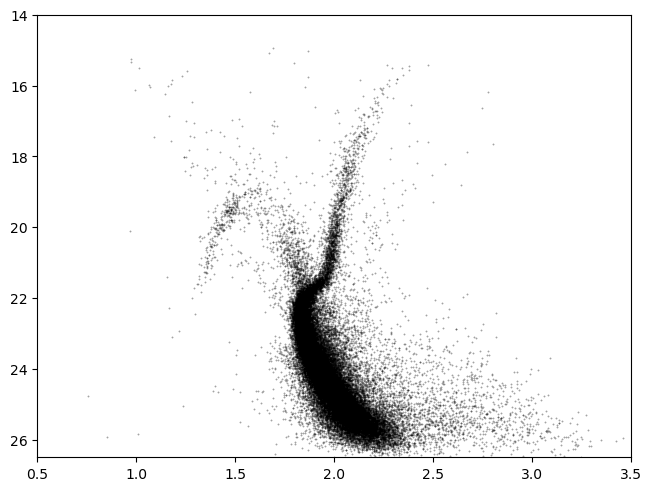

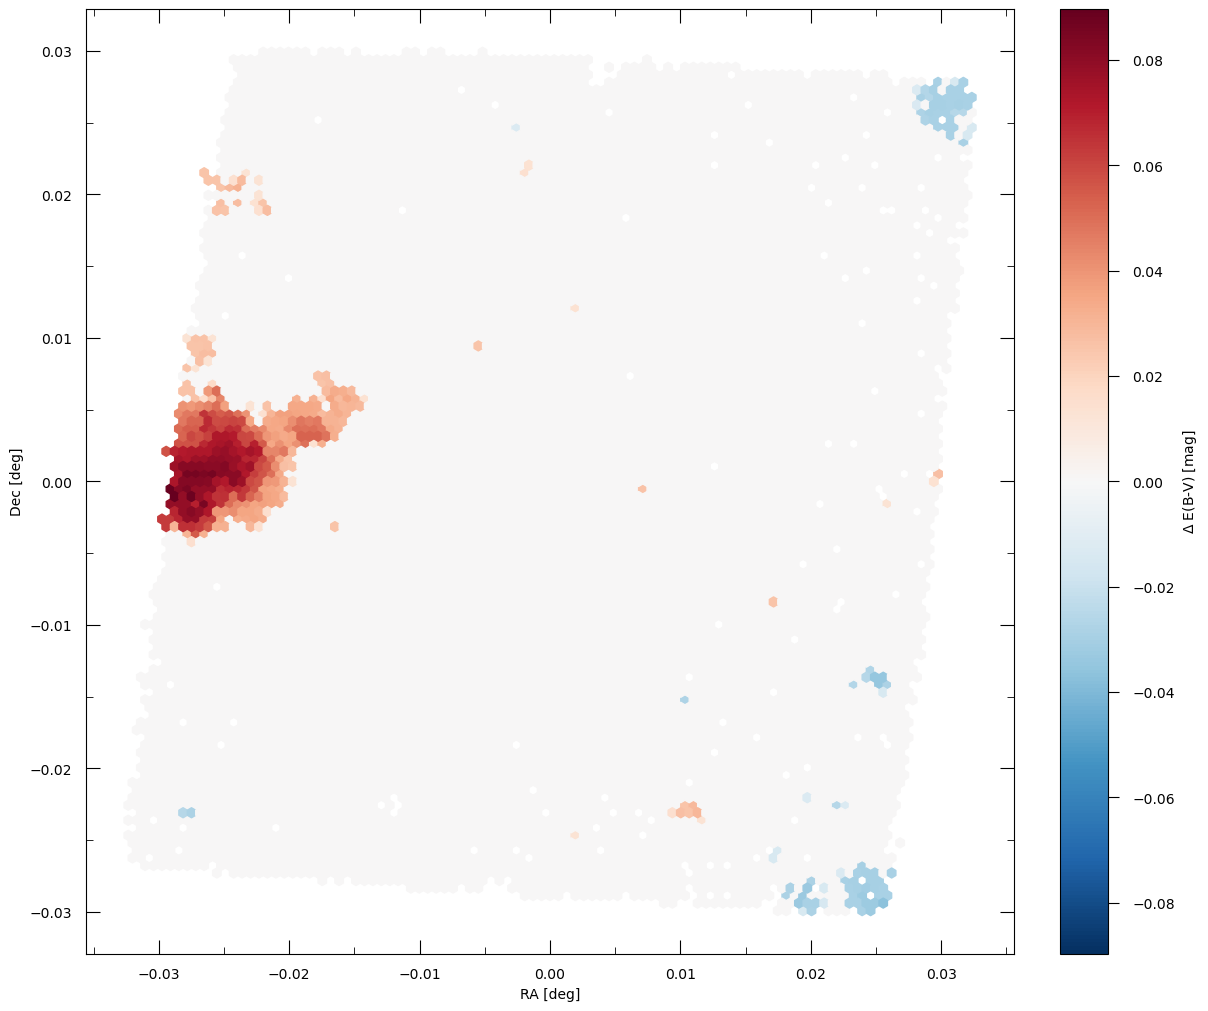

...differential reddening completed
EBV stat: 0.0016, -0.0366, 0.0896
Start decontamionation process..
	#### GROUP N.1 ####


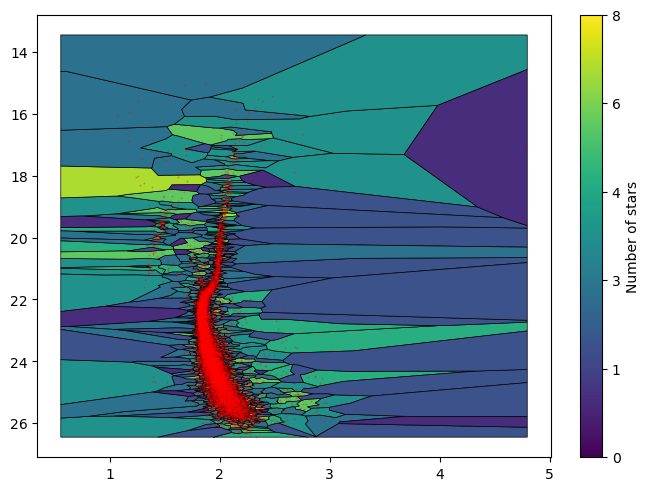

	Membership (mean, min, max): (0.8274, 0.0000, 0.9900)


	#### GROUP N.2 ####


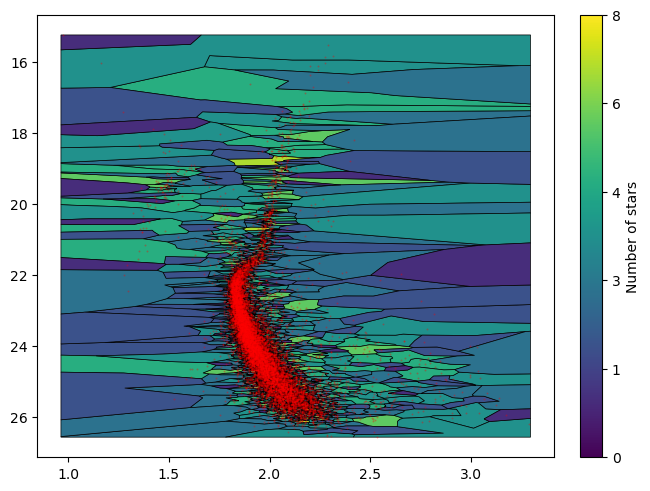

	Membership (mean, min, max): (0.8043, 0.0000, 0.9900)


	#### GROUP N.3 ####


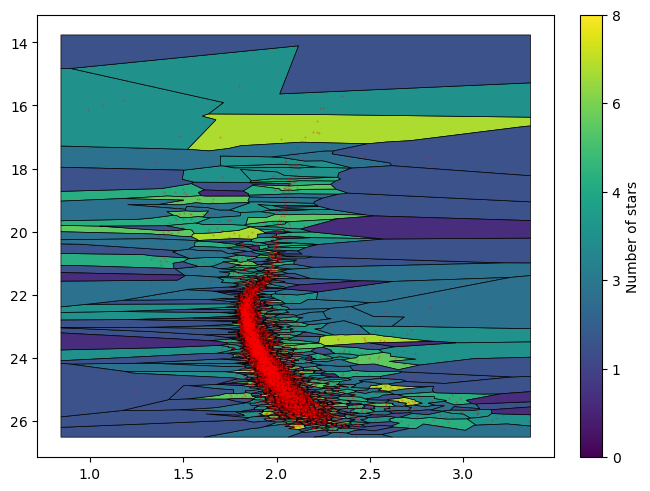

	Membership (mean, min, max): (0.7950, 0.0000, 0.9900)


	#### GROUP N.4 ####


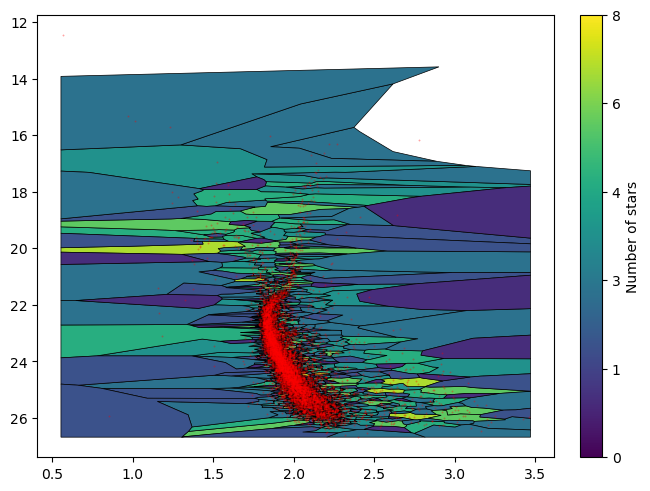

	Membership (mean, min, max): (0.7752, 0.0000, 0.9900)


	#### GROUP N.5 ####


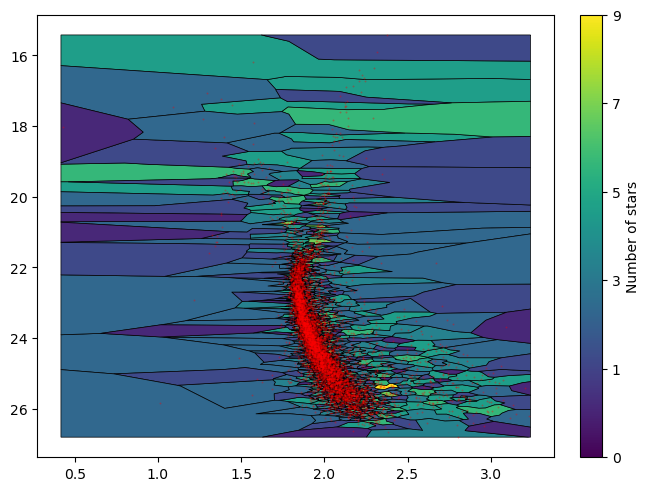

	Membership (mean, min, max): (0.7516, 0.0000, 0.9900)


	#### GROUP N.6 ####


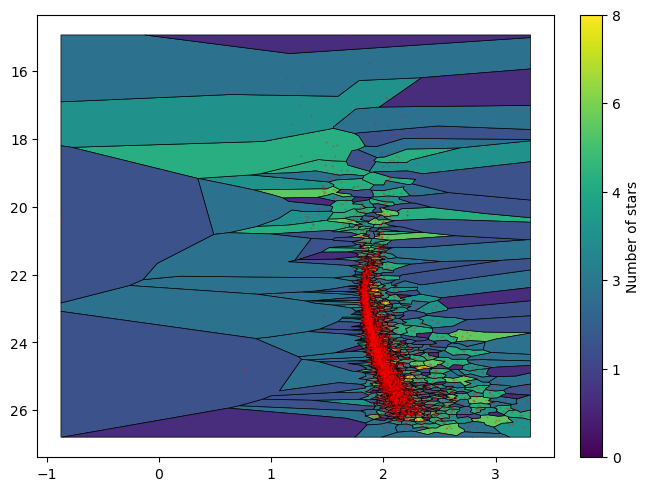

	Membership (mean, min, max): (0.7331, 0.0000, 0.9900)


ITERATION 3
compute differential reddening..
count    50097.000000
mean         0.886177
std          0.223665
min          0.000000
25%          0.900000
50%          0.980000
75%          1.000000
max          1.000000
Name: membership, dtype: float64
do calcuation of the Correction threshold


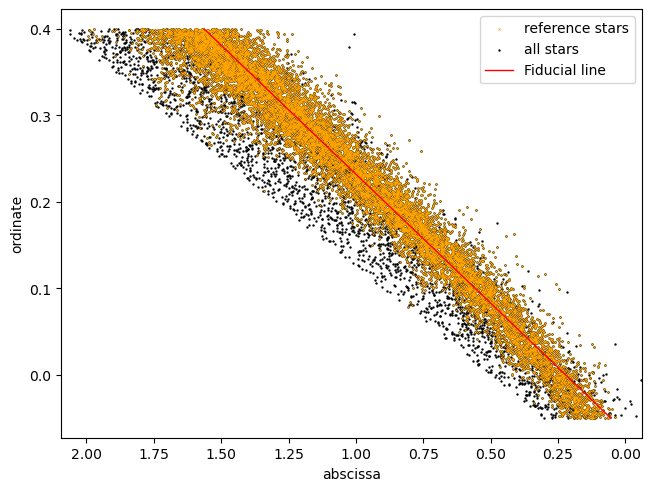

correction threshold at: 0.019


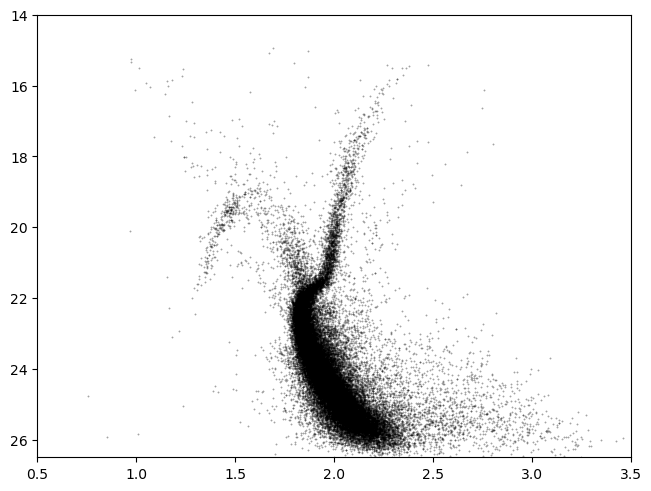

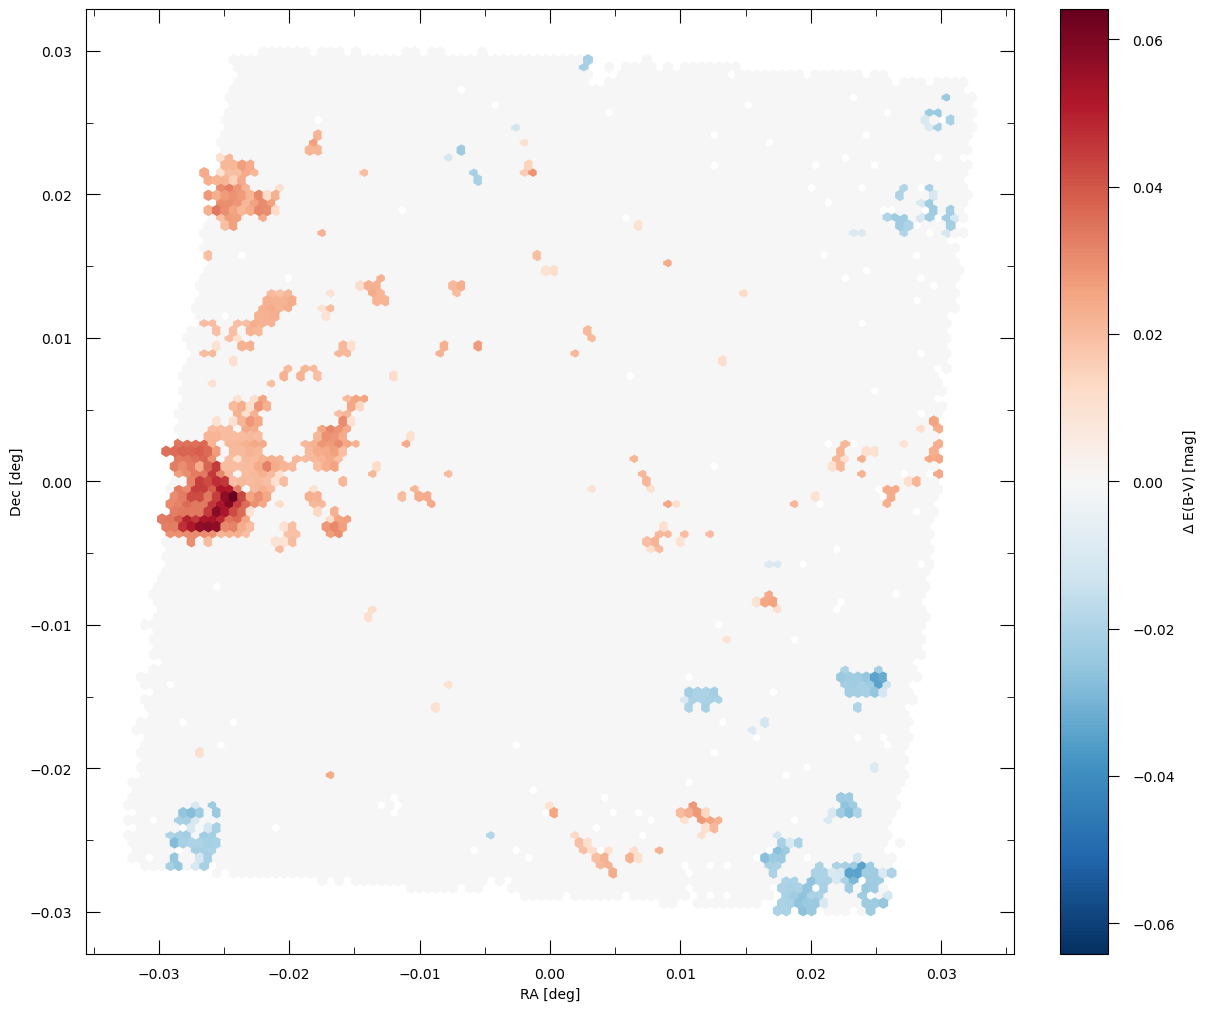

...differential reddening completed
EBV stat: 0.0011, -0.0367, 0.0641
Start decontamionation process..
	#### GROUP N.1 ####


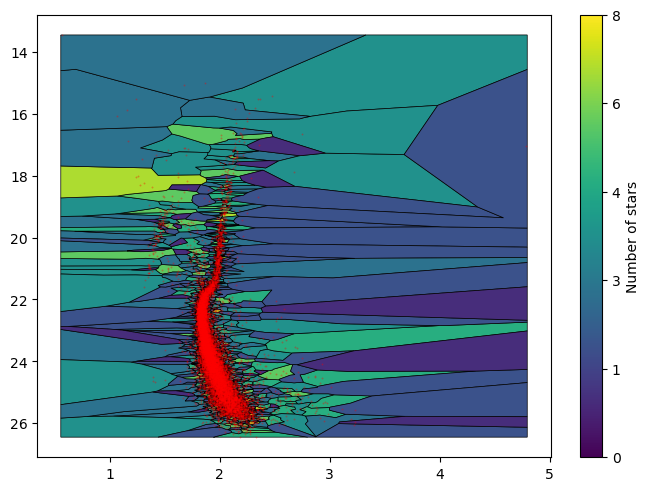

	Membership (mean, min, max): (0.8279, 0.0000, 0.9900)


	#### GROUP N.2 ####


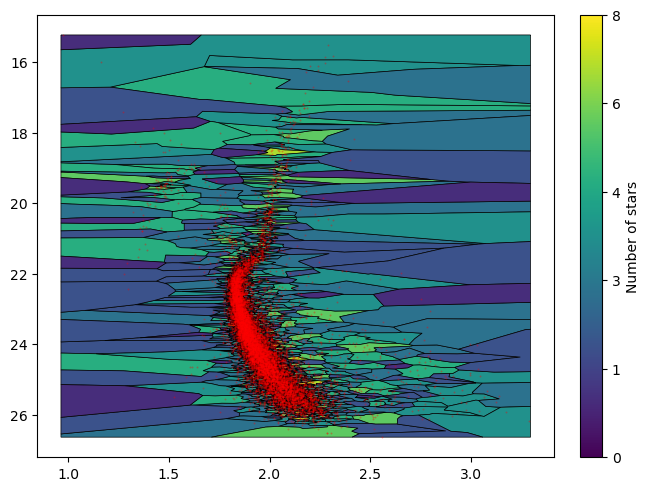

	Membership (mean, min, max): (0.8044, 0.0000, 0.9900)


	#### GROUP N.3 ####


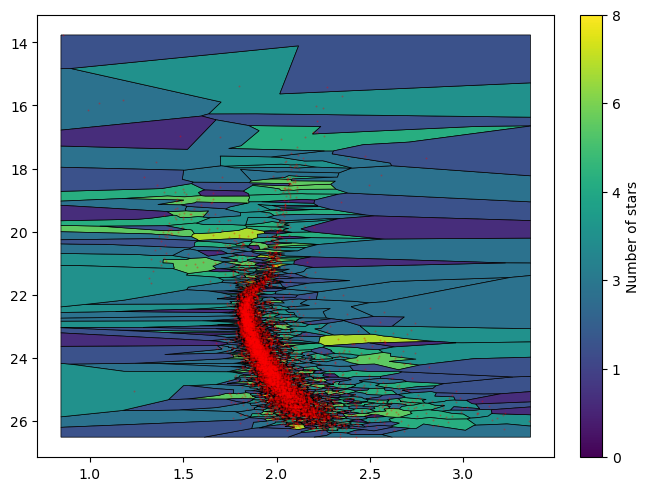

	Membership (mean, min, max): (0.7943, 0.0000, 0.9900)


	#### GROUP N.4 ####


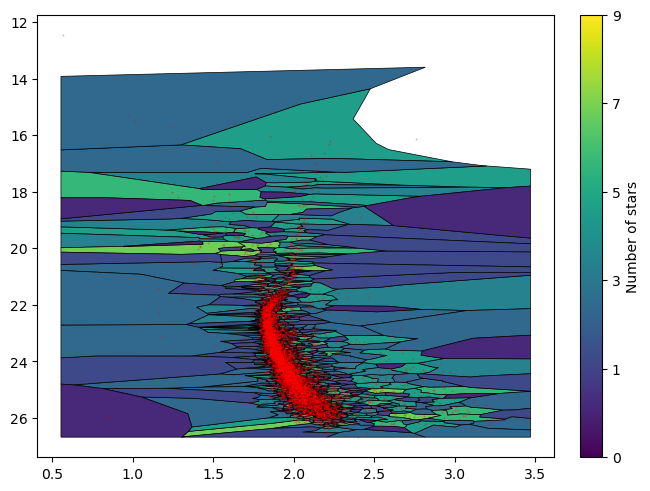

	Membership (mean, min, max): (0.7743, 0.0000, 0.9900)


	#### GROUP N.5 ####


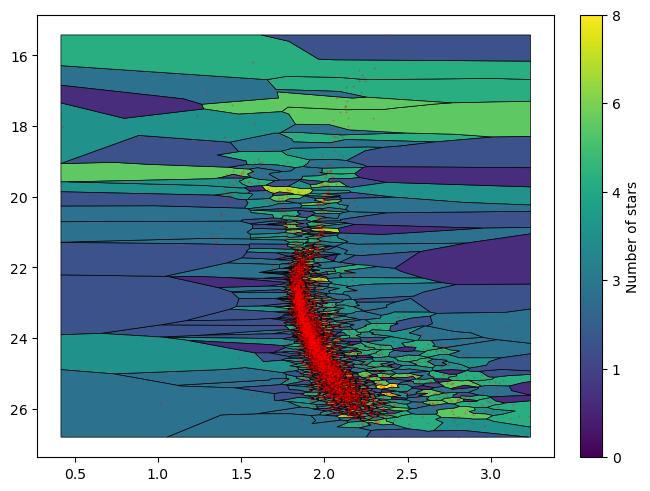

	Membership (mean, min, max): (0.7510, 0.0000, 0.9900)


	#### GROUP N.6 ####


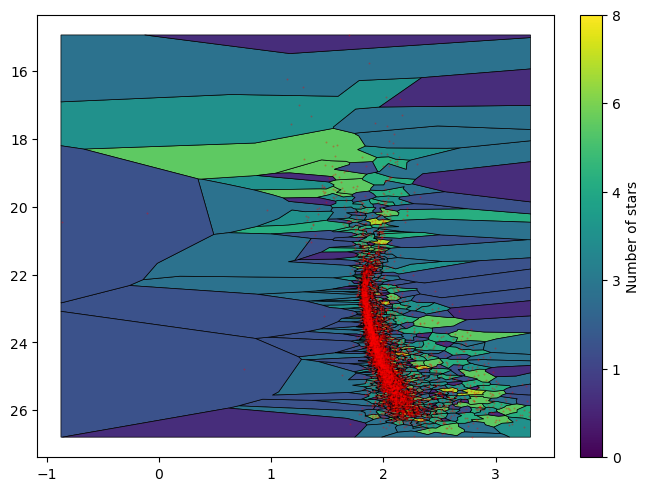

	Membership (mean, min, max): (0.7338, 0.0000, 0.9900)




In [4]:
# reload(stat_mem)

# setting up the parameters for the reddening correction
dr_params = {
    "rband1": 0.903,
    "rband2": 0.597,
    "TO_mag": 22,
    "TO_color": 1.75,
    "nref": 20,
    "xcol": "x(3)",
    "ycol": "y(4)",
    "band1": cluster_mag[0],
    "band2": cluster_mag[1],
    "ord_step": 0.2,
}

ord_max = 0.4  # 0.40
ord_min = -0.05  # -2.0  # -0.05
roi = np.array([[1.0, ord_max], [2.1, ord_max], [0.3, ord_min], [-0.2, ord_min]])
# roi = np.array([[-0.8, ord_max], [0, ord_max], [-4, ord_min], [-5, ord_min]])

# compute ememberhsip and reddening correction
df_cluster_corr = stat_mem.do_statistical_membership(
    df_cluster,
    df_field,
    field_mag,
    dr_params,
    racol="ra(1)",
    deccol="dec(2)",
    fov_ratio=fov_acs / fov_wfc3,
    roi=roi,
    minstars=1000,
    memebership_iter=100,
    member_threshold=0.9,
    plot_dred=True,
    plot_voronoi=True,
)

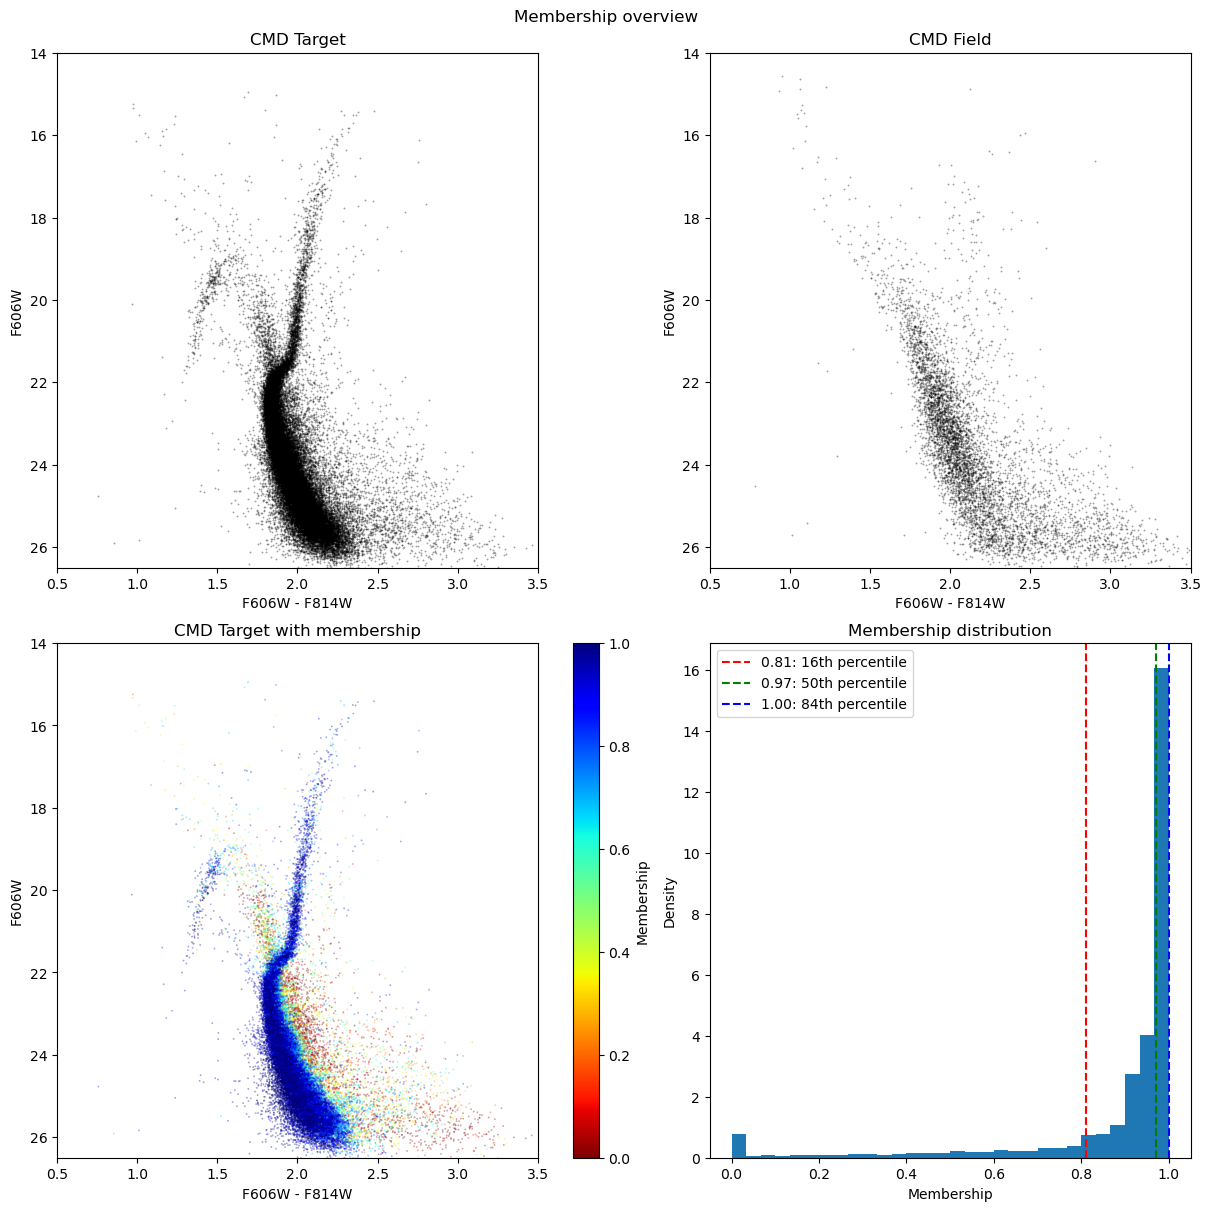

In [5]:
_ = utplot.plot_cmd_comparison(
    df_cluster_corr,
    df_field,
    cluster_mag_corr,
    field_mag,
    "Membership overview",
    xlim=(0.5, 3.5),
    ylim=(26.5, 14),
)

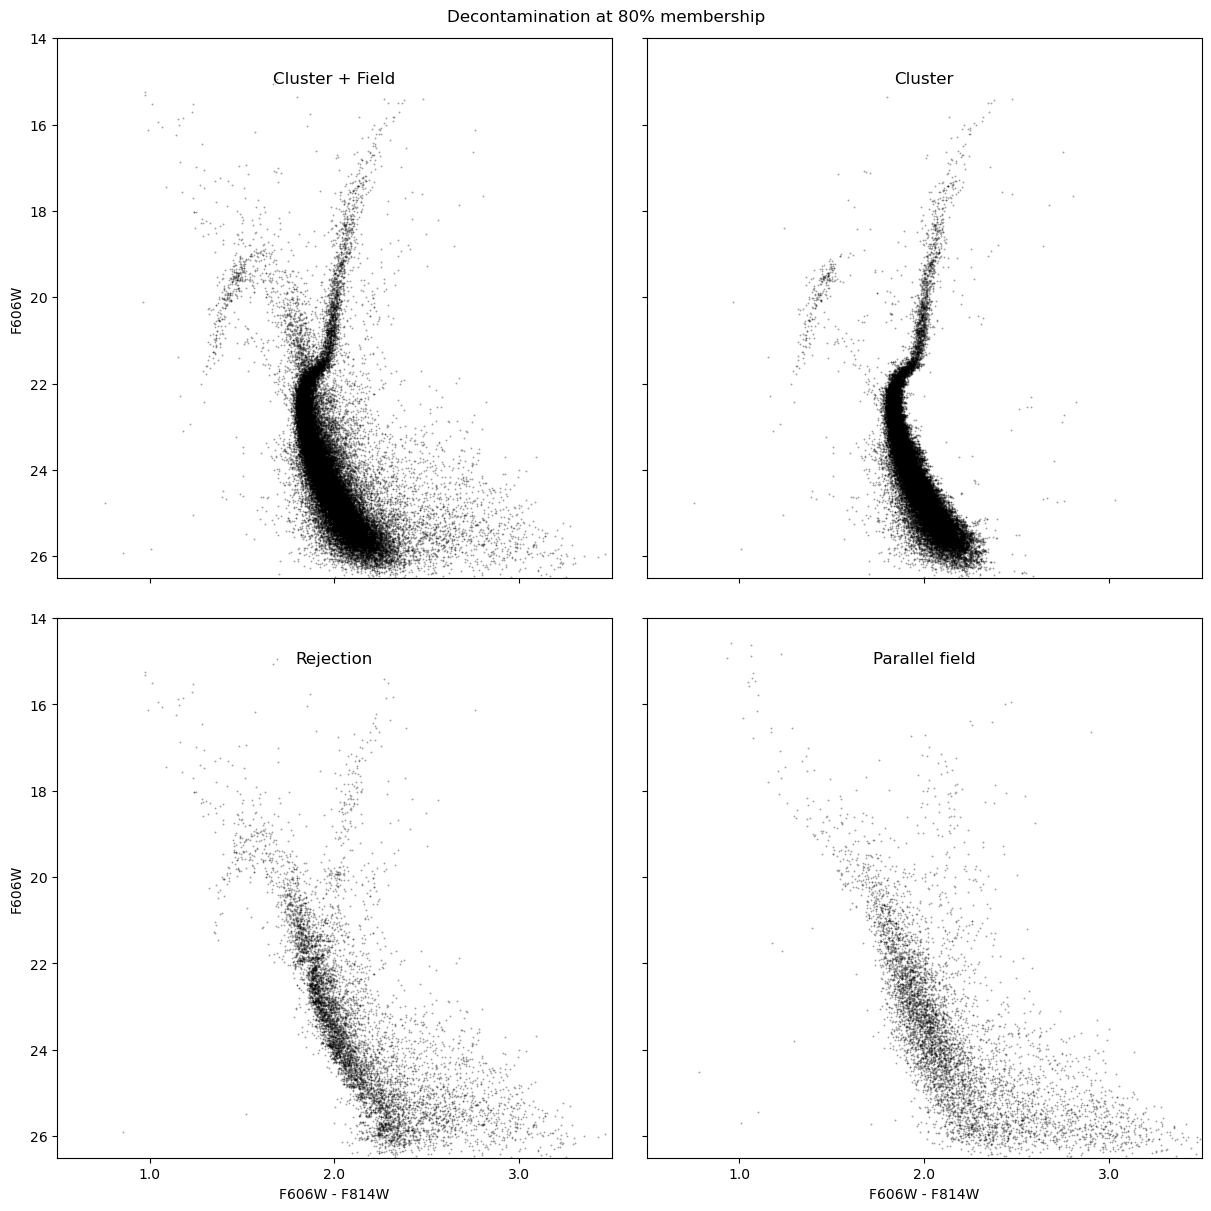

In [6]:
_ = utplot.plot_cmd_membership_overview(
    df_cluster_corr,
    df_field,
    0.8,
    cluster_mag_corr,
    field_mag,
    xlim=(0.5, 3.5),
    ylim=(26.5, 14),
)

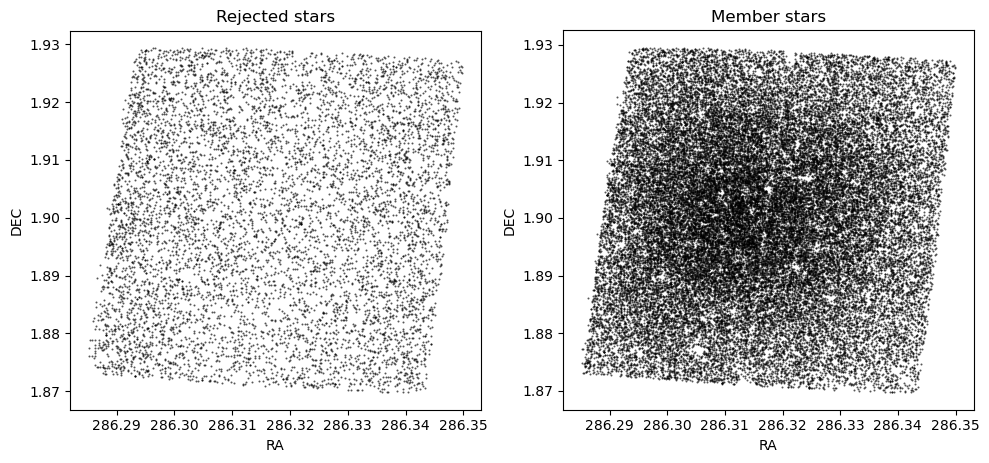

In [7]:
_ = utplot.plot_spatial_membership(df_cluster_corr, "ra(1)", "dec(2)", 0.8)

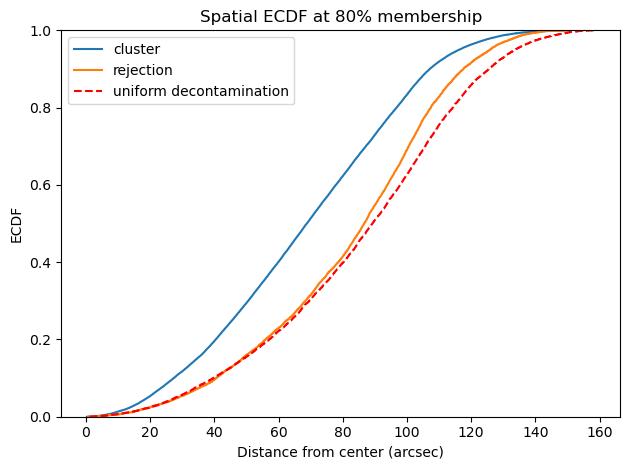

In [8]:
_ = utplot.spatial_ecdf(df_cluster_corr, "ra(1)", "dec(2)", 0.8)

In [9]:
ra_center = (
    df_cluster["ra(1)"].min()
    + (df_cluster["ra(1)"].max() - df_cluster["ra(1)"].min()) / 2
)
dec_center = (
    df_cluster["dec(2)"].min()
    + (df_cluster["dec(2)"].max() - df_cluster["dec(2)"].min()) / 2
)

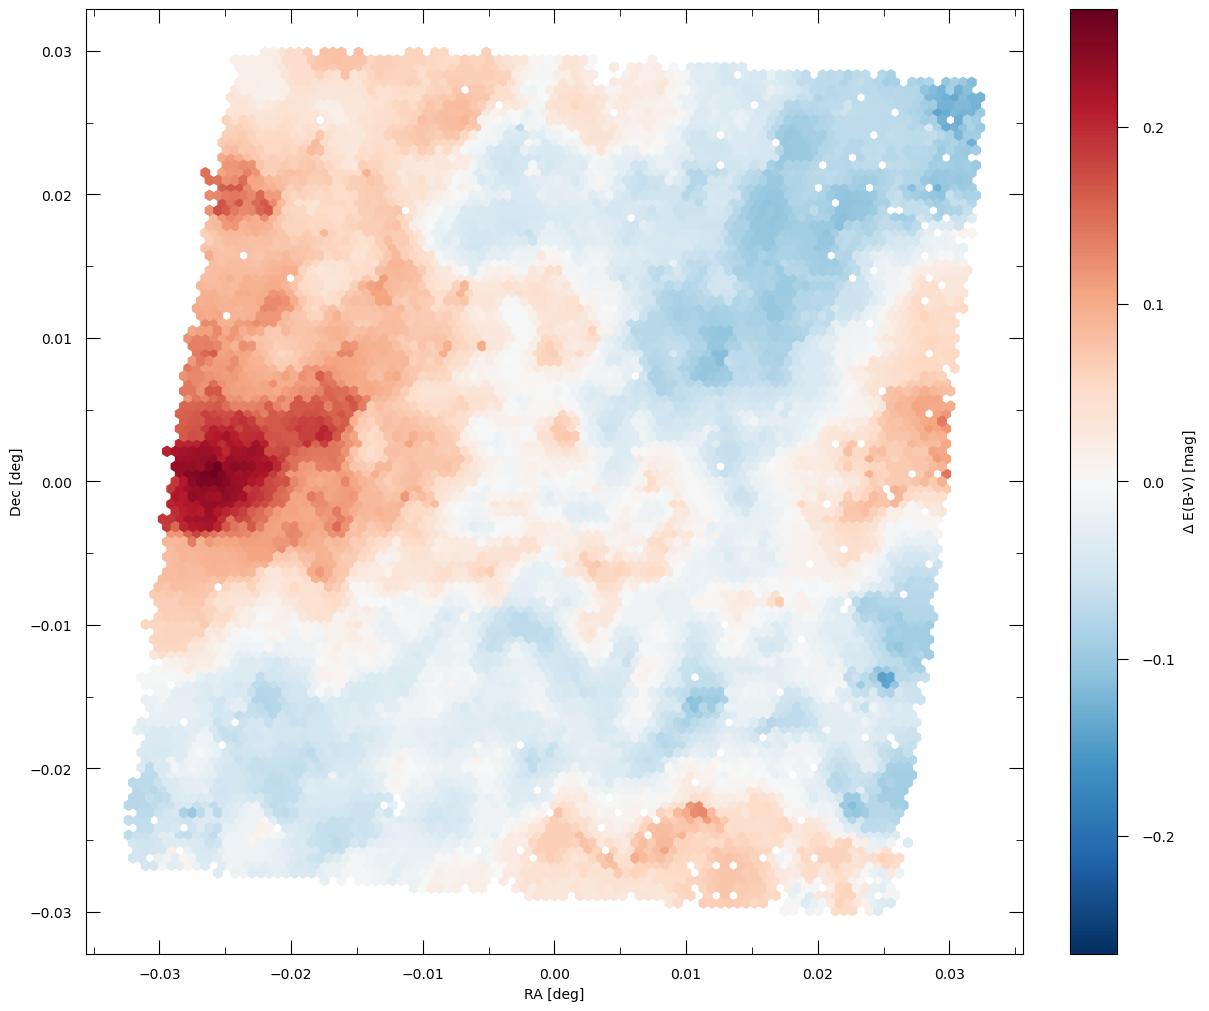

In [10]:
_ = utplot.plot_reddening_map(
    df_cluster_corr["ra(1)"],
    df_cluster_corr["dec(2)"],
    ra_center,
    dec_center,
    df_cluster_corr["delta_ebv"],
)